In [1]:
import json
from datetime import date

import pandas as pd

pd.options.display.float_format = '{:,.3f}'.format
pd.options.display.max_rows = None
pd.options.display.width = None

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
%matplotlib inline

from nys_soda import get_data

CFG_FILE = 'config.json'

origin_date = date(year=1970, month=1, day=1)
def fix_plt_date(x, pos):
    actual_date = origin_date + mdates.num2timedelta(x)
    return actual_date.strftime('%Y-%m-%d')

with open(CFG_FILE) as f:
    cfg = json.load(f)

data = get_data(cfg['SOCRATA_TOKEN'])

In [2]:
data[-15:]

,new_cases,tests,ratio
2020-05-30,552,23370,0.024
2020-05-31,461,21253,0.022
2020-06-01,613,24933,0.025
2020-06-02,495,22585,0.022
2020-06-03,534,24795,0.022
2020-06-04,534,24952,0.021
2020-06-05,571,29394,0.019
2020-06-06,458,25129,0.018
2020-06-07,384,22713,0.017
2020-06-08,340,18789,0.018


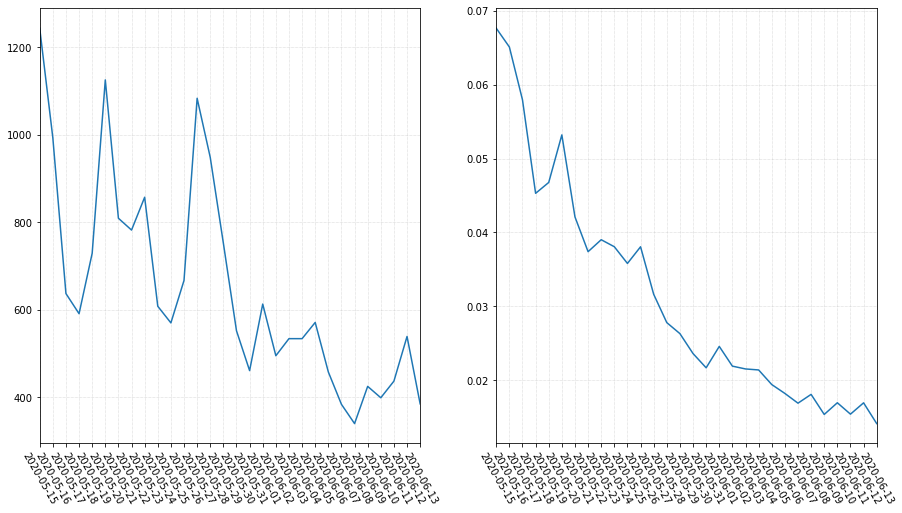

In [3]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 8))

columns = ('new_cases', 'ratio')  
for axis, column in zip(axes, columns):
    data[-30:][column].plot(ax=axis, rot=-60)
    axis.xaxis.set_major_locator(mdates.DayLocator())
    axis.xaxis.set_major_formatter(FuncFormatter(fix_plt_date))
    axis.tick_params(axis='x', which='minor', bottom=False)
    axis.grid(linestyle=':', linewidth='0.5')
        

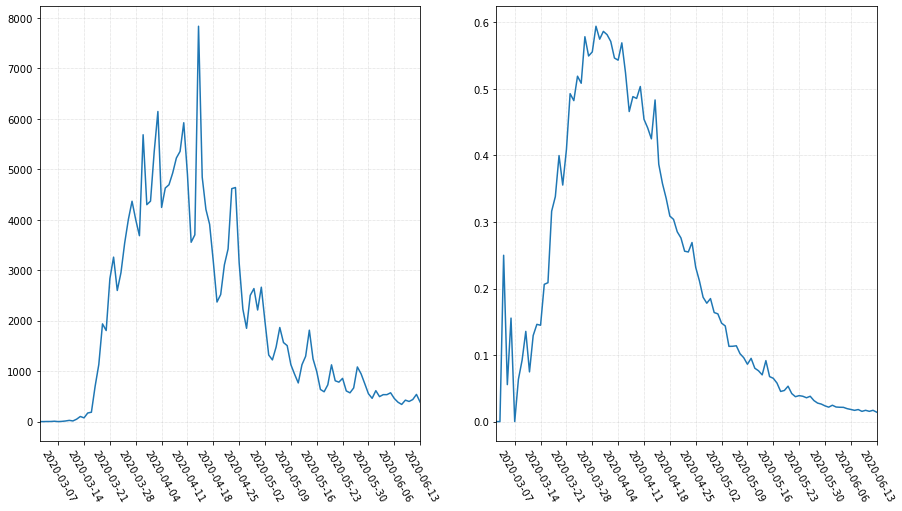

In [4]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 8))

columns = ('new_cases', 'ratio')
for axis, column in zip(axes, columns):
    data[column].plot(ax=axis, rot=-60)
    axis.xaxis.set_major_locator(mdates.WeekdayLocator())
    axis.xaxis.set_major_formatter(FuncFormatter(fix_plt_date))
    axis.tick_params(axis='x', which='minor', bottom=False)
    axis.grid(linestyle=':', linewidth='0.5')